In [1]:
import os
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.datasets import mnist
from tensorflow.keras.initializers import *
from tensorflow.keras.callbacks import *

Using TensorFlow backend.


In [2]:
def create_model(x):
    model = Sequential([
                        Conv2D(32, kernel_size=(5,5), strides=(1,1), input_shape=x.shape[1:], padding='same'),
                        Activation('tanh'),
                        AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                        
                        Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same'),
                        Activation('tanh'),
                        AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        
                        Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same'),
                        Activation('tanh'),
        
                        Flatten(),
                        Dense(10, activation='softmax')
                       ])
    
    model.compile(
                  optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    
    return model

In [3]:
def random_prediction(model, X, n=3):
    rand = np.random.randint(len(X),size=n)
    
    for i in range(0,n):
        predictions = model.predict(x_test)
        plt.imshow(X[rand[i]].reshape(28,28), cmap= plt.cm.binary)
        plt.show()
        print("Prediction of the model:", np.argmax(predictions[rand[i]]), "\n")

In [4]:
def plot_accuracy_and_loss(training, epochs):
    x_axis = np.linspace(0, epochs-1, epochs)
    plt.figure(figsize=(6, 3))
    plt.ylim(-0.2,0.45)
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.plot(x_axis, training.history['loss'], 'xb-')
    plt.plot(x_axis, training.history['val_loss'], 'xr-')
    plt.legend(['train', 'test'])
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plt.ylim(0.7,1.25)
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.plot(x_axis, training.history['accuracy'], 'xb-')
    plt.plot(x_axis, training.history['val_accuracy'], 'xr-' )
    plt.legend(['train', 'test'])
    plt.show()

In [5]:
def save_model(model):
    dir_path = "/Users/zeynep068/deep-learning/models"

    if not os.path.exists(dir_path):
        os.mkdir(dir_path)

    mnist_model_path = os.path.join(dir_path, "mnist_cnn.h5")

    model.save_weights(filepath=mnist_model_path)

In [6]:
def logs_path(): # tb callback erstellen
    log_dir = "/Users/zeynep068/deep-learning/logs" # path, wo wir die tensorboard logs speichern wollen

    if not os.path.exists(log_dir):
        os.mkdir(log_dir)
    return log_dir

## load and prepare data

In [7]:
(x_train_original, y_train), (x_test_original, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train_original, axis=1)
x_test = tf.keras.utils.normalize(x_test_original, axis=1)

x_train = x_train.reshape((-1, 28,28, 1))
x_test = np.expand_dims(x_test, axis=-1) # same as reshape((-1,28,28,1))

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

width, height, depth = x_train.shape[1:]

In [8]:
EPOCHS = 20
BATCH_SIZE = 128

model = create_model(x_train)

tb = TensorBoard(log_dir=logs_path(),
                 histogram_freq=1, 
                 write_graph=True
                )  

In [9]:
training = model.fit(
                     x_train,
                     y_train,
                     batch_size=BATCH_SIZE, 
                     epochs=EPOCHS,
                     validation_data=(x_test, y_test),
                     callbacks=[tb])

model.summary() 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.3096 - accuracy: 0.9072 - val_loss: 0.1338 - val_accuracy: 0.9582
Epoch 2/20
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.1194 - accuracy: 0.9618 - val_loss: 0.0838 - val_accuracy: 0.9754
Epoch 3/20
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0775 - accuracy: 0.9763 - val_loss: 0.0853 - val_accuracy: 0.9720
Epoch 4/20
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.0641 - val_accuracy: 0.9811
Epoch 5/20
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0768 - val_accuracy: 0.9769
Epoch 6/20
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0396 - accuracy: 0.9863 - val_loss: 0.0621 - val_accuracy: 0.9824
Epoch 7/20
60000/60000 [==============================] 

In [10]:
print("Test set result after whole training")
validation = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

Test set result after whole training
10000/10000 [==============================] - 3s 316us/sample - loss: 0.0918 - accuracy: 0.9816


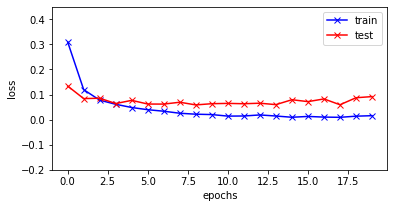

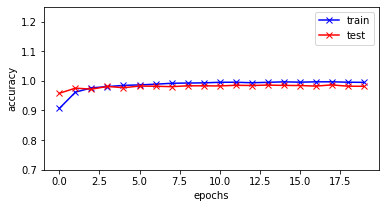

In [11]:
plot_accuracy_and_loss(training, EPOCHS)

Pick randomly images and predict their result:


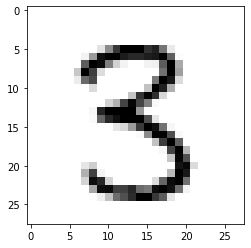

Prediction of the model: 3 



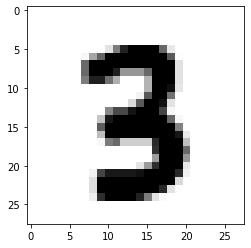

Prediction of the model: 3 



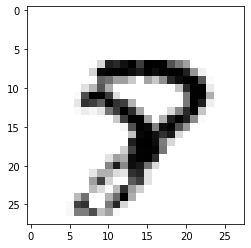

Prediction of the model: 7 



In [12]:
print("Pick randomly images and predict their result:")
random_prediction(model, x_test_original)

In [13]:
save_model(model)